# Joint Spectrum

Analysis of and operations on joint spectral amplitude functions.

## Rotated Elliptical Gaussian

A Gaussian ellipse aligned with the $x$ or $y$ axis has the form:

$$ \exp{(-\frac{x^2}{2\sigma^2})} \exp{(-\frac{y^2}{2\rho^2})} $$

An arbitrary ellipse has cross terms however, and can be written in the form:

$$ \exp{(-Ax^2-2Bxy-Cy^2)} $$

which is an aligned Gaussian ellipse that has been rotated clockwise by angle $\theta$ [[ref]](https://en.wikipedia.org/wiki/Gaussian_function#Meaning_of_parameters_for_the_general_equation), where

$$ A = \frac{\cos^2\theta}{2\sigma^2} + \frac{\sin^2\theta}{2\rho^2} $$

$$ B = (\frac{1}{4\sigma^2} - \frac{1}{4\rho^2})\sin 2\theta $$

$$ C = \frac{\sin^2\theta}{2\sigma^2} + \frac{\cos^2\theta}{2\rho^2} $$

And the reverse:

$$ \theta = -\frac{1}{2} \arctan (\frac{2B}{A-C}) $$

$$ \frac{1}{2\sigma^2} = A\cos^2\theta - 2B\cos\theta\sin\theta + C\sin^2\theta $$

$$ \frac{1}{2\rho^2} = A\sin^2\theta + 2B\cos\theta\sin\theta + C\cos^2\theta $$



In [1]:
from jointspectrum import *
a,b,c = abc(θ=0.5,σ=5,ρ=1)
θ,σ,ρ = θσρ(a=a,b=b,c=c)
(a,b,c),(θ,σ,ρ)

((0.13032744659164647, 0.20195303635389517, 0.38967255340835355),
 (0.5, 5.0, 1.0))

## Elliptical Gaussian Purity

$$f(x,y) = \exp{\left( -A x^2 + 2B xy - C y^2 \right)}$$

We will show the Gaussian ellipse has a purity

$$ P = \sqrt{1-\frac{B^2}{AC}}. $$

Define:

$$ A = \frac{1+\mu^2}{2(1-\mu^2)} \alpha_1^2 $$

$$ B = \frac{\mu}{1-\mu^2} \alpha_1\alpha_2 $$

$$ C = \frac{1+\mu^2}{2(1-\mu^2)} \alpha_2^2 $$

Then $f$ has the following Schmidt decomposition [[ref]](https://arxiv.org/abs/quant-ph/0305192):

$$ f(x,y) = \sum_{n=0}^{\infty} \sqrt{λ_n} u_n(\alpha_1 x) u_n(\alpha_2 y) $$

where

$$ u_n(x) = \frac{1}{\sqrt{2^nn!}} H_n(x) e^{-\frac{1}{2}x^2} $$

$$ λ_n = (1-\mu^2) \mu^{2n} $$

and $H_n(x)$ are the Hermite polynomials [[ref]](https://en.wikipedia.org/wiki/Hermite_polynomials)

<!-- $H_0(x)=1$, $H_1(x)=2x$, $H_2(x)=4x^2-2$, $H_3(x)=8x^3-12x$, $H_4(x)=16x^4-48x^2+12$, ... -->

$$ H_0(x) = 1 $$

$$ H_1(x) = 2x $$

$$ H_2(x) = 4x^2 - 2 $$

$$ H_3(x) = 8x^3 - 12x $$

Furthermore, the Schmidt number $K$ and purity $P$ are

$$ P = \frac{1}{K} = \sum_{n=0}^\infty λ_n^2 = \frac{1-\mu^2}{1+\mu^2}. $$

Observe that the quantity

$$ 1 - \frac{B^2}{AC} = \left( \frac{1-\mu^2}{1+\mu^2} \right)^2 = P^2 $$

so the purity in terms of $A$, $B$, $C$ is:

$$ P = \sqrt{1-\frac{B^2}{AC}} $$

To obtain the Schmidt decomposition in terms of $A$, $B$, $C$, note that

$$ \alpha_1 = \sqrt{2AP}, $$

$$ \alpha_2 = \sqrt{2CP}, $$

$$ \mu = \frac{B}{|B|}\sqrt{\frac{1-P}{1+P}}. $$



In [2]:
ellipticalgaussianpurity(a=2,b=0.5,c=1)


0.9354143466934853

## SPDC Joint Spectrum

The joint spectral amplitude for spontaneous parametric downconversion has the following form, where x = $ω_s-ω_{s0}$ is the signal frequency and y = $ω_i-ω_{i0}$ is the idler frequency, with an energy conservation term where $p$ is determined by the pulse bandwidth, and a momentum conservation term where $q$ is determined by the phase matching bandwidth. The phase matching angle $θ$ depends upon the dispersion of the nonlinear material.

$$ f_\mathrm{JSA}(x,y) = e^{-p(x+y)^2} e^{-q(y\cos\theta+x\sin\theta)^2} $$

$$ f_\mathrm{JSA}(x,y) = e^{-(p+q\sin^2\theta)x^2} e^{-2(p+q\sin\theta\cos\theta)xy} e^{-(p+q\cos^2\theta)y^2}$$

Define:

$$ A = p+q\sin^2\theta $$

$$ B = -(p+q\sin\theta\cos\theta) $$

$$ C = p+q\cos^2\theta $$

Also defining $r ≡ p/q$, the purity is

$$ P = \sqrt{1 - \frac{B^2}{AC}} = \sqrt{1 - \frac{(r+\sin\theta\cos\theta)^2}{(r+\sin^2\theta)(r+\cos^2\theta)}} $$

We can observe that unit purity is obtained when $-\tfrac{\pi}{2} < \theta < 0$ and $r=|\sin\theta\cos\theta|$. For $0 < \theta < \tfrac{\pi}{2}$ we find that $\frac{d}{dr}P=0$ when $r=\sin\theta\cos\theta$. So in both cases we obtain maximum purity when

$$ r = \frac{p}{q} = |\sin\theta\cos\theta|  = \left|\frac{1}{2}\sin2\theta\right|. $$

And the maximum purity obtained is

$$ P = 1 \text{ if } -\frac{\pi}{2} < \theta < 0 $$

$$ P = \left|\frac{1-\tan\theta}{1+\tan\theta}\right| \text{ if } 0 < \theta < \frac{\pi}{2} $$

<!-- 
$$
P =
\left\{
\begin{aligned}
&  1  & \text{if}& & -\frac{\pi}{2} < \theta < 0 \\
&\left|\frac{1-\tan\theta}{1+\tan\theta}\right| & \text{if}& & 0 < \theta < \frac{\pi}{2}
\end{aligned}
\right.
$$
-->

In [3]:
θ = phasematchangle(780,780,sell='ktpwg',Type='yzy',degrees=False)
r = 0.5*sin(2*θ)
P = apodizedmaxpurity(θ)
print(f"θ = {θ*180/pi:g}°")
print(f"p/q = {r:g}")
print(f"P = {100*P:g}%")

θ = 53.6122°
p/q = 0.477576
P = 15.1453%


## Frequency Converted Joint Spectrum

Frequency conversion following SPDC results in an effective joint spectrum that depends upon the joint spectrum of the downconversion, $f_\mathrm{JSA}≡f$ and the joint spectrum of the frequency conversion, $f_\mathrm{JCA}≡g$

$$ f(x,y) = \exp{\left( -A x^2 + 2B xy - C y^2 \right)} $$

$$ g(y,z) = \exp{\left( -D y^2 + 2E yz - F z^2 \right)} $$

The effective joint spectrum, $f_\mathrm{eff}≡h$, is [[ref]](https://link.aps.org/accepted/10.1103/PhysRevApplied.17.064014)

$$ h(x,z) = \int f(x,y) g(y,z) dy $$

$$ h(x,z) = \exp{\left( -A x^2 \right)} \exp{\left( -F z^2 \right)} \int \exp{\left( -(C+D) y^2 + 2(Bx+Ez) y \right)} dy $$

Observe that

$$ \int e^{ -ay^2 + 2by } dy = \int e^{ -a(y-\frac{b}{a})^2 } e^{ \frac{b^2}{a} } dy = \sqrt{\tfrac{\pi}{a}} e^{ \frac{b^2}{a} } $$

Therefore

$$ h(x,z) = \sqrt{\tfrac{\pi}{C+D}} \exp{\left( -(A-\tfrac{B^2}{C+D}) x^2 \right)}
            \exp{\left( +2(\tfrac{BE}{C+D}) xz \right)} 
            \exp{\left( -(F-\tfrac{E^2}{C+D}) z^2 \right)} $$

Defining $a≡\tfrac{B^2}{AC}=1-P_\mathrm{JSA}^2$,  $b≡\tfrac{E^2}{DF}=1-P_\mathrm{JCA}^2$,  $c≡\tfrac{C}{D}$, then for the purity $P$ of the effective joint spectrum we have

$$ 1-P^2 = \frac{ab}{(1+\tfrac{1}{c}-a)(1+c-b)} $$

Maximum purity occurs when $\frac{d}{dc}P=0$, resulting in

$$ c = \sqrt{\frac{1-b}{1-a}} $$

And the maximum purity is

$$ P = \sqrt{1-\frac{(1-P_\mathrm{JSA}^2)(1-P_\mathrm{JCA}^2)}{(1+P_\mathrm{JSA}P_\mathrm{JCA})^2}}. $$

Unit purity only results if one of the input purities is equal to one, but the output purity is always greater than either of the input purities. In fact the increase in purity is dramatic:


In [4]:
for P1,P2 in [(0,0.01),(0.01,0.01),(0.1,0.1),(0.5,0.5),(0.9,0.9),(0.99,0.99)]:
    print(f"({P1:.2f},{P2:.2f}) → {fcspdcpurity(P1,P2):g}")

(0.00,0.01) → 0.01
(0.01,0.01) → 0.019998
(0.10,0.10) → 0.19802
(0.50,0.50) → 0.8
(0.90,0.90) → 0.994475
(0.99,0.99) → 0.999949


## Hermite-Gaussian temporal modes

We will define the temporal modes as the standard Hermite-Gaussian functions:

$$ f(t) = \frac{1}{\sqrt{2ⁿn!}} H_n\left(\tfrac{t}{σ_t}\right) e^{-\tfrac{1}{2}\left(\frac{t}{σ_t}\right)^2}$$

$$ σ_t = \frac{ τ_\textrm{FWHM} }{ 2\sqrt{\ln{2}} } $$

The amplitude never exceeds one which will allow us to enforce subunity gain. Note that $τ_\textrm{FWHM}$ is the full-width-half-max of the $n=0$ mode (half-max intensity not amplitude).

The first four modes are plotted for $τ_\textrm{FWHM}$ = 0.1ns.


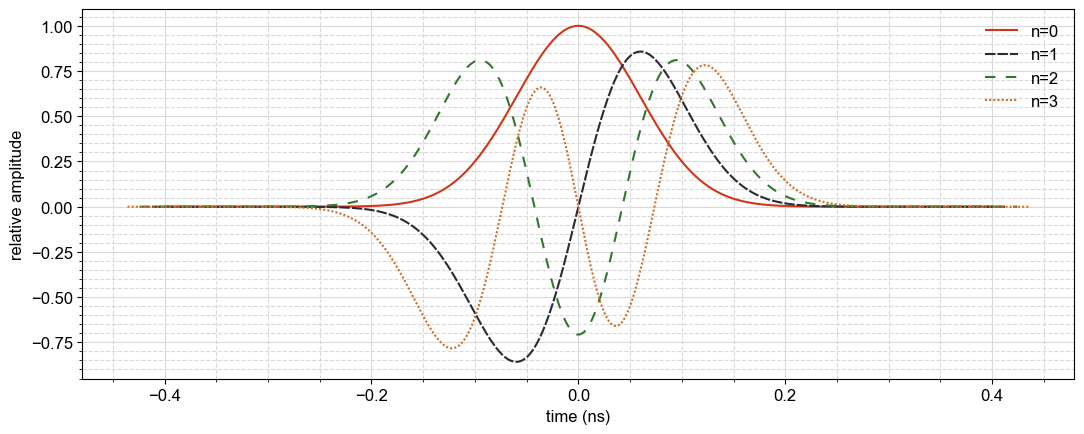

In [5]:
from wavedata import Wave
ws = [hermitegausstemporalmode(n,dt=0.1,num=501).rename(f"n={n}") for n in range(4)]
Wave.plots(*ws,l='0123',x='time (ns)',y='relative amplitude',scale=(2,1),fork=0,grid=1);

Modes for a particular value of $τ_\mathrm{FWHM}$ form a complete basis and therefore are orthogonal.

In [6]:
a = hermitegausstemporalmode(0,dt=0.1)
b = hermitegausstemporalmode(2,dt=0.1)(a.x)
(a*b).area()

5.001469104277204e-06

## Hermite-Gaussian spectral modes

The spectral modes are the Fourier transform of the temporal modes and are the same except for scaling:

$$ F(ω) = \frac{1}{σ_ω\sqrt{2ⁿn!}} H_n\left(\tfrac{ω}{σ_ω}\right) e^{-\tfrac{1}{2}\left(\frac{ω}{σ_ω}\right)^2}$$

$$ σ_ω = \frac{ 1 }{ σ_t } $$

These relations are also helpful:

$$ σ_ω = \frac{ ω_\textrm{FWHM} }{ 2\sqrt{\ln{2}} } $$

$$ ω = 2πf $$

$$ σ_ω = 2πσ_f $$

$$ σ_f = \frac{ f_\textrm{FWHM} }{ 2\sqrt{\ln{2}} } $$

And for the $n=0$ mode only we also have:

$$ f_\textrm{FWHM} = \frac{2\ln{2}}{πτ_\textrm{FWHM}} $$




1.0000000001358058


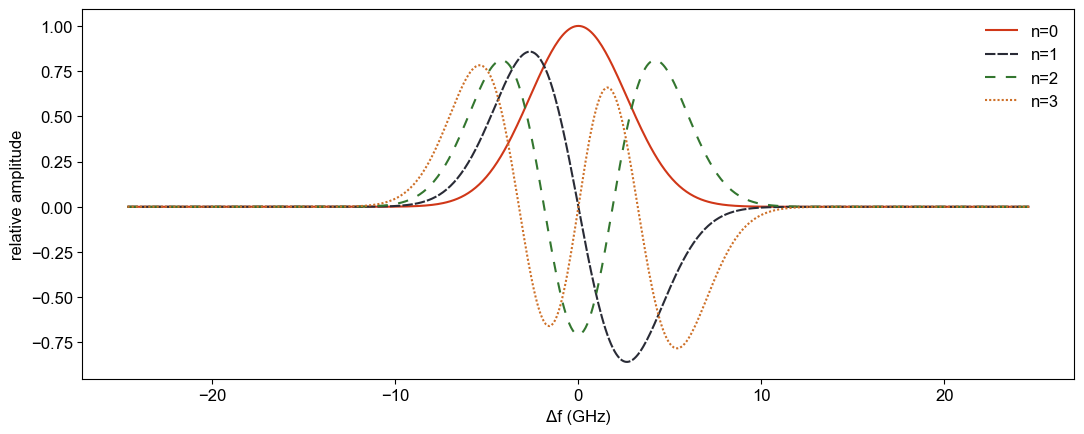

In [7]:
print(hermitegaussspectralmode(n=0,λ=1560,dt=0.1,dλ=0.2,num=501,ghz=0).area())
ws = [hermitegaussspectralmode(n,λ=1560,dt=0.1,dλ=0.2,num=501,ghz=1).rename(f"n={n}") for n in range(4)]
Wave.plots(*[w/ws[0].max() for w in ws],l='0123',x='Δf (GHz)',y='relative amplitude',scale=(2,1),fork=0);

## Hermite-Gauss mode upconversion

Let's assume perfect phase matching for now. We can achieve near 100% upconversion when the pump (escort) pulse is much longer than the input pulse, which is to be expected since the pump then appears to be cw as far as the input pulse is concerned.

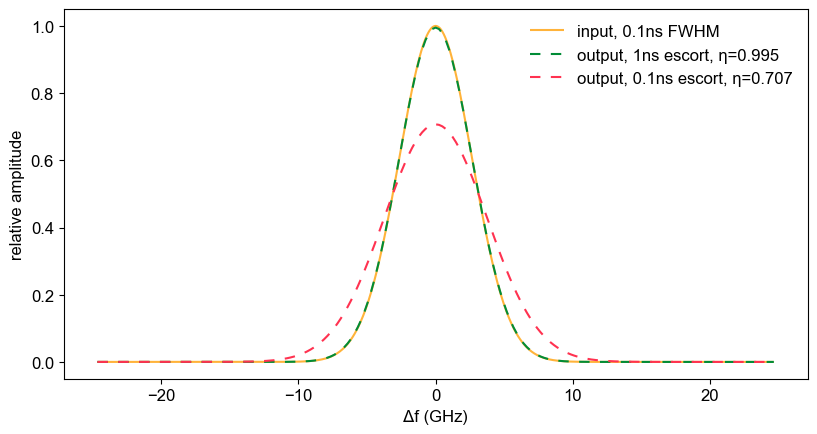

In [8]:
def modeupconversionplot(n,m,λ=1560,dt=0.1,dλ=0.2,num1=1001,num3=201):
    a = hermitegaussspectralmode(n,λ,dt=dt,dλ=dλ,num=num1)
    ts = (1,0.1)
    bs = [fjcahop(m,λ,λ,dt=t,L=0,dλ1=dλ,dλ3=dλ,num1=num1,num3=num3) for t in ts]
    cs = [innerproduct(a,b) for b in bs]
    ηs = [(c**2).area()/(a**2).area() for c in cs]
    # cs,ηs = zip(*[upconvertedmode(t,n,m,λ,dt=dt,dλ=dλ,num1=num1,num3=num3) for t in ts])
    ws = [invnm2ghz(c)/a.max() for c in cs]
    ws = [c.rename(f'output, {t:g}ns escort, η={η:.3f}') for c,t,η in zip(ws,ts,ηs)]
    w0 = (invnm2ghz(a)/a.max()).rename('input, 0.1ns FWHM')
    Wave.plots(w0,*ws,x='Δf (GHz)',y='relative amplitude',c='120',l='022',scale=(1.5,1),fork=0)
modeupconversionplot(n=0,m=0)

The situation is similar when the input pulse is a higher order mode.

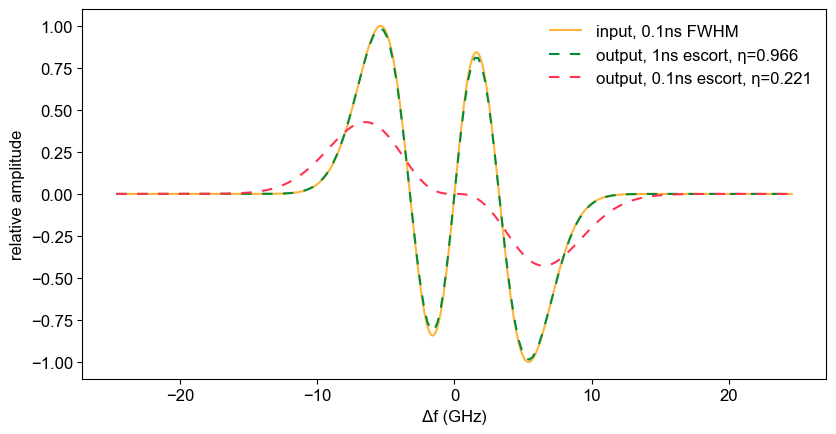

In [9]:
modeupconversionplot(n=3,m=0)

The efficiency falls off faster for higher order modes.

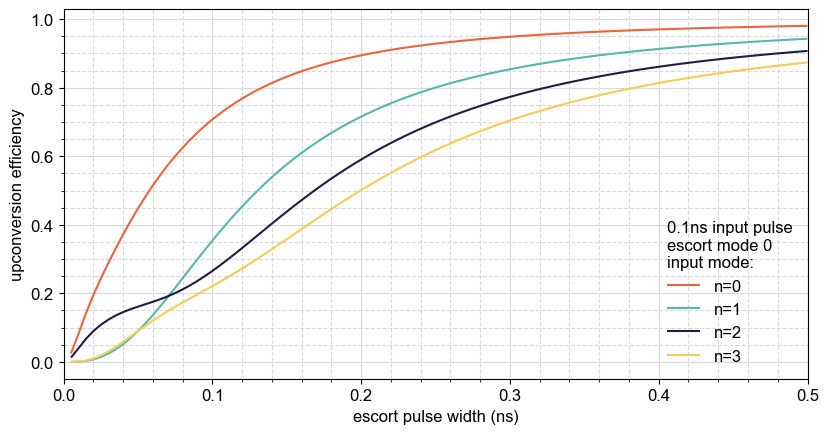

In [10]:
def upconvertedefficiency(tescort,n,m,λ=1560,dt=0.1,dλ=0.2,num1=201,num3=201):
    a = hermitegaussspectralmode(n,λ,dt=dt,dλ=dλ,num=num1)
    b = fjcahop(m,λ,λ,dt=tescort,L=0,dλ1=dλ,dλ3=dλ,num1=num1,num3=num3)
    c = innerproduct(a,b)
    return (c**2).area()/(a**2).area()
def ηvst(n,m):
    ts = np.linspace(0.005,0.5,100)
    ηs = [upconvertedefficiency(t,n,m) for t in ts]
    return Wave(ηs,ts,f"n={n}")
Wave.plots(*[ηvst(n,0) for n in range(4)],x='escort pulse width (ns)',y='upconversion efficiency',
    legendtext='0.1ns input pulse\nescort mode 0\ninput mode:',scale=(1.5,1),grid=1,xlim=(0,0.5),fork=0);

Now let's look at the situation where the input pulse is a Gaussian and the escort pulse is a higher order mode. The results are quite different.

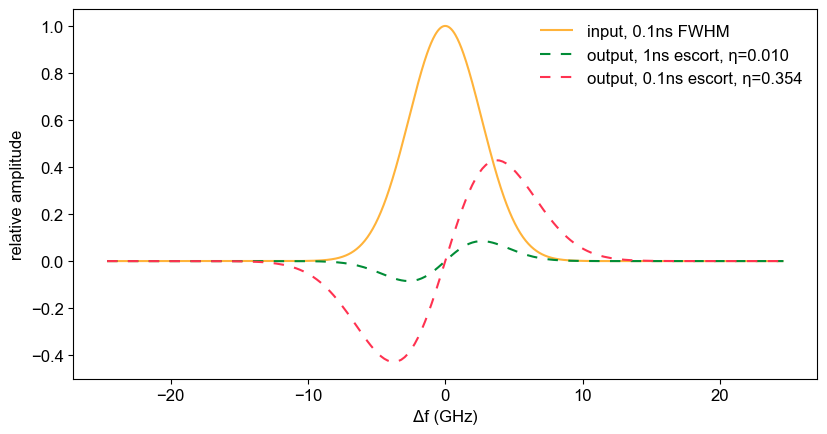

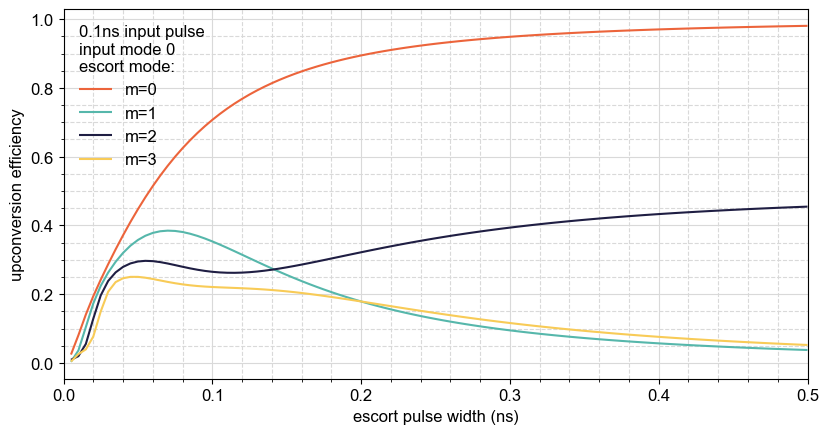

In [11]:
modeupconversionplot(n=0,m=1)
Wave.plots(*[ηvst(0,m).rename(f"m={m}") for m in range(4)],x='escort pulse width (ns)',y='upconversion efficiency',
    legendtext='0.1ns input pulse\ninput mode 0\nescort mode:',scale=(1.5,1),grid=1,xlim=(0,0.5),fork=0);